In [139]:
import numpy as np
import pandas as pd
from io import StringIO
#import warnings
#warnings.filterwarnings('ignore')
import acquire
import prepare
# grab Decision Tree Classifier and some helping friends from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# get classification metrix for model assessment
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:


1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
#acquire train data 
df = acquire.get_titanic_data()
train, validate, test = prepare.prep_titanic_data(df)
train.shape, validate.shape, test.shape

((534, 10), (178, 10), (179, 10))

In [3]:
train.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,1,3,0,0,7.8958,1,1,0,0
380,380,1,1,0,0,227.5250,1,0,0,0
492,492,0,1,0,0,30.5000,1,1,0,1
55,55,1,1,0,0,35.5000,1,1,0,1
243,243,0,3,0,0,7.1250,1,1,0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             534 non-null    int64  
 1   survived                 534 non-null    int64  
 2   pclass                   534 non-null    int64  
 3   sibsp                    534 non-null    int64  
 4   parch                    534 non-null    int64  
 5   fare                     534 non-null    float64
 6   alone                    534 non-null    int64  
 7   sex_male                 534 non-null    uint8  
 8   embark_town_Queenstown   534 non-null    uint8  
 9   embark_town_Southampton  534 non-null    uint8  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 34.9 KB


In [5]:
# X is going to be our entire domain, indepedent variables, minus the target variable
# y is going to be our target variable, the dependent thing that we are using X to predict

X_train = train.drop(columns = "survived")
y_train = train.survived
X_validate = validate.drop(columns = "survived")
y_validate = validate.survived
X_test = test.drop(columns = "survived")
y_test = test.survived

In [6]:
#check X_train: independent variable
X_train.head()

,passenger_id,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,3,0,0,7.8958,1,1,0,0
380,380,1,0,0,227.5250,1,0,0,0
492,492,1,0,0,30.5000,1,1,0,1
55,55,1,0,0,35.5000,1,1,0,1
243,243,3,0,0,7.1250,1,1,0,1


In [7]:
#check the target variable
y_train.head()

455    1
380    1
492    0
55     1
243    0
Name: survived, dtype: int64

In [8]:
#value counts the target variable
y_train.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [9]:
y_train.value_counts(normalize = True)

0    0.616105
1    0.383895
Name: survived, dtype: float64

baseline model is the mode of target varible, which is did not survive in this case.
baseline accuracy is the percent value of baseline model here which is 61.61% here

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [10]:
# create decision tree
model1 = DecisionTreeClassifier(max_depth=1)

In [11]:
#fit the random forest algorithm on to training sample
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [12]:
#make prediction on train observation
y_pred = model1.predict(X_train)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [13]:
#estimate probability
y_pred_proba = model1.predict_proba(X_train)
y_pred_proba

array([[0.81321839, 0.18678161],
       [0.24731183, 0.75268817],
       [0.81321839, 0.18678161],
       ...,
       [0.81321839, 0.18678161],
       [0.81321839, 0.18678161],
       [0.24731183, 0.75268817]])

#3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [14]:
#accuracy of decision tree classifier on training set: 
round(model1.score(X_train,y_train),2)

0.79

In [15]:
# y_train, y_predict should also give same accuracy score
accuracy_score(y_train,y_pred)

0.7921348314606742

In [16]:
#confusin matrix
confusion_matrix(y_train,y_pred)

array([[283,  46],
       [ 65, 140]])

In [17]:
pd.DataFrame(classification_report(y_train,y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.813218,0.752688,0.792135,0.782953,0.789981
recall,0.860182,0.682927,0.792135,0.771555,0.792135
f1-score,0.836041,0.716113,0.792135,0.776077,0.790001
support,329.000000,205.000000,0.792135,534.000000,534.000000


[Text(0.5, 0.75, 'sex_male <= 0.5\ngini = 0.473\nsamples = 534\nvalue = [329, 205]\nclass = perished'),
 Text(0.25, 0.25, 'gini = 0.372\nsamples = 186\nvalue = [46, 140]\nclass = survived'),
 Text(0.75, 0.25, 'gini = 0.304\nsamples = 348\nvalue = [283, 65]\nclass = perished')]

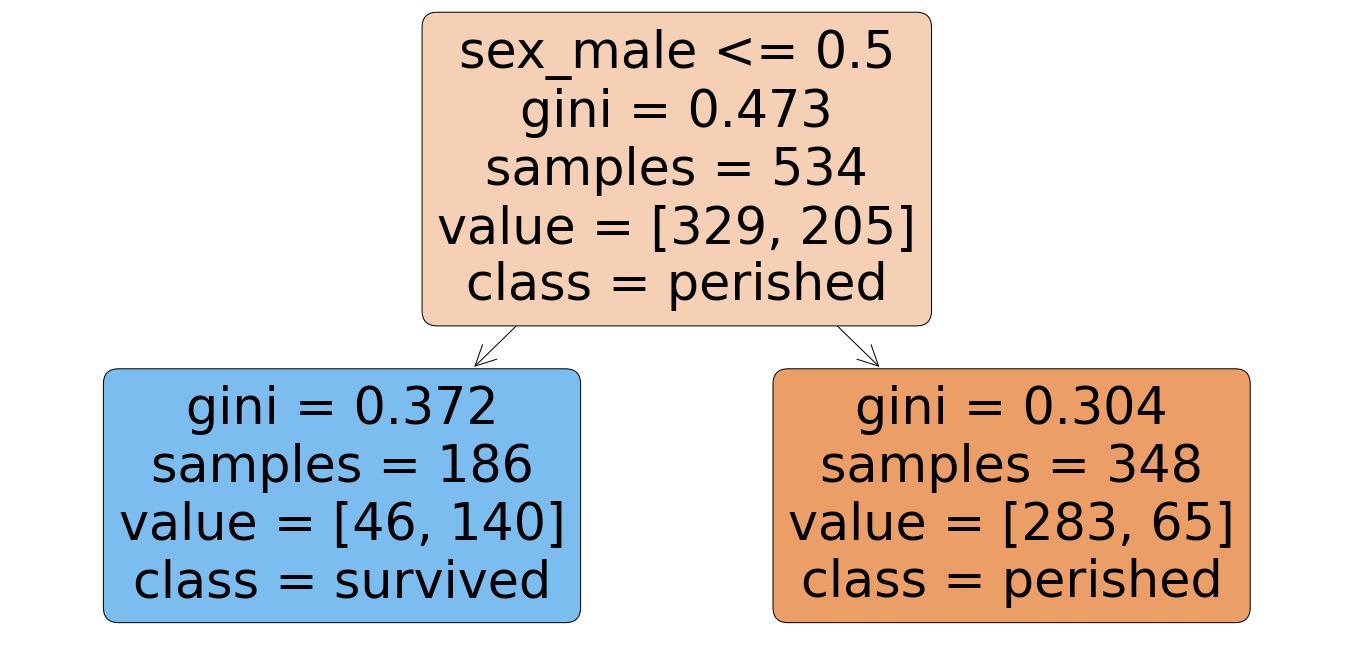

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (24,12))
plot_tree(model1,
          feature_names = X_train.columns.tolist(),
         class_names  = ["perished","survived"],
         filled = True,
         rounded = True)

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [19]:
con= confusion_matrix(y_train,y_pred)
con

array([[283,  46],
       [ 65, 140]])

In [20]:
#using great stuff Madaline showed
rubric_df = pd.DataFrame({
    "pred_death": ["TN","FN"],
    "pred_survive":["FP", "TP"]
}
    ,index=["actual_death","actual_suvive"]
)
rubric_df

,pred_death,pred_survive
actual_death,TN,FP
actual_suvive,FN,TP


In [21]:
#combine the con with rubric 
rubric_df + ':' + con.astype(str)

,pred_death,pred_survive
actual_death,TN:283,FP:46
actual_suvive,FN:65,TP:140


In [25]:
#our values
TN = 283
FP= 46
FN=65
TP=140

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [26]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy 

0.7921348314606742

In [36]:
#true positive rate is same as recall
true_positive_rate = TP/(TP+FN)
true_positive_rate

0.6829268292682927

In [28]:
false_positive_rate = FP/(FP+TN)
false_positive_rate

0.1398176291793313

In [30]:
true_negative_rate = FN/(FN+TP)
true_negative_rate

0.3170731707317073

In [31]:
precision = TP/(TP+FP)
precision

0.7526881720430108

In [37]:
#recall is same as true positive rate
recall = true_positive_rate

In [38]:
f1_score = 2 * (precision * recall)/(precision+recall)
f1_score

0.7161125319693095

In [40]:
support_positive = TP + FN
support_positive

205

In [41]:
support_negative = FP + TN
support_negative

329

5. Run through steps 2-4 using a different max_depth value.

In [42]:
#make another decision tree classifier and fit training data
model2 = DecisionTreeClassifier(max_depth = 3)
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [43]:
#make prediction on train observation on depedent variable
y_pred = model2.predict(X_train)
y_pred


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [44]:
#crosstab of actual and prediction, same as confusion matrix
pd.crosstab(y_train,y_pred)

col_0,0,1
survived,,
0,293,36
1,63,142


In [66]:
confusion_matrix(y_train,y_pred)

array([[293,  36],
       [ 63, 142]])

In [68]:
#estimate probability
y_pred_proba = model2.predict_proba(X_train)
y_pred_proba

array([[0.90322581, 0.09677419],
       [0.        , 1.        ],
       [0.61458333, 0.38541667],
       ...,
       [0.90322581, 0.09677419],
       [0.90322581, 0.09677419],
       [0.        , 1.        ]])

In [59]:
#classification report in a dataframe
pd.DataFrame(classification_report(y_train,y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.823034,0.797753,0.814607,0.810393,0.813328
recall,0.890578,0.692683,0.814607,0.791630,0.814607
f1-score,0.855474,0.741514,0.814607,0.798494,0.811726
support,329.000000,205.000000,0.814607,534.000000,534.000000


[Text(0.5, 0.875, 'sex_male <= 0.5\ngini = 0.473\nsamples = 534\nvalue = [329, 205]\nclass = perished'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.372\nsamples = 186\nvalue = [46, 140]\nclass = survived'),
 Text(0.125, 0.375, 'passenger_id <= 298.0\ngini = 0.078\nsamples = 98\nvalue = [4, 94]\nclass = survived'),
 Text(0.0625, 0.125, 'gini = 0.252\nsamples = 27\nvalue = [4, 23]\nclass = survived'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 71\nvalue = [0, 71]\nclass = survived'),
 Text(0.375, 0.375, 'fare <= 24.808\ngini = 0.499\nsamples = 88\nvalue = [42, 46]\nclass = survived'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 75\nvalue = [30, 45]\nclass = survived'),
 Text(0.4375, 0.125, 'gini = 0.142\nsamples = 13\nvalue = [12, 1]\nclass = perished'),
 Text(0.75, 0.625, 'fare <= 18.275\ngini = 0.304\nsamples = 348\nvalue = [283, 65]\nclass = perished'),
 Text(0.625, 0.375, 'passenger_id <= 36.5\ngini = 0.193\nsamples = 222\nvalue = [198, 24]\nclass = perished'),
 Text(0.5625, 0.125

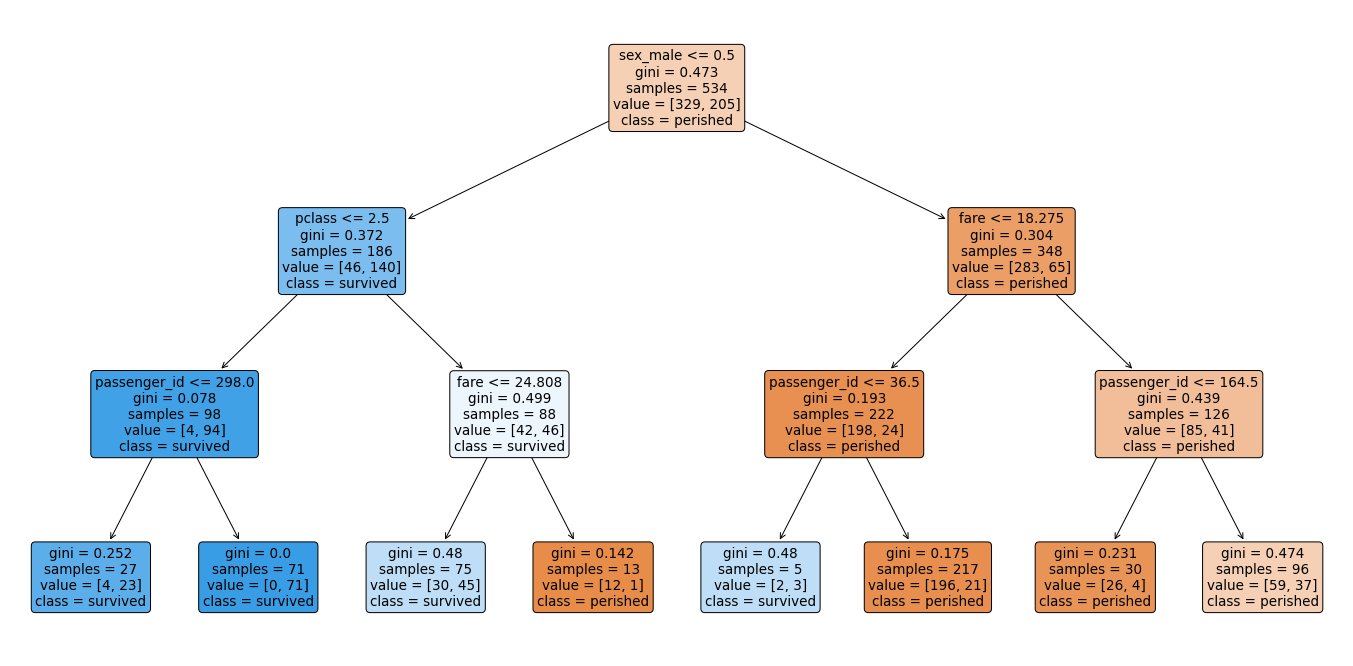

In [47]:
#plot the tree
plt.figure(figsize = (24,12))
plot_tree(model2,
          feature_names = X_train.columns.tolist(),
         class_names  = ["death","survived"],
         filled = True,
         rounded = True)

In [52]:
con= confusion_matrix(y_train,y_pred)
con

array([[293,  36],
       [ 63, 142]])

In [51]:
rubric = pd.DataFrame({"pred_dead":["TN","FN"],
                        "pred_survived": ["FP","TP"]},
                     index=["actual_dead","actual_survived"])
rubric

,pred_dead,pred_survived
actual_dead,TN,FP
actual_survived,FN,TP


In [53]:
rubric + ':' + con.astype(str)

,pred_dead,pred_survived
actual_dead,TN:293,FP:36
actual_survived,FN:63,TP:142


Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [56]:
TN = 293
FP = 36
FN=63
TP=142

In [57]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
accuracy 

0.8146067415730337

In [58]:
#true positive rate is same as recall
true_positive_rate = TP/(TP+FN)
true_positive_rate

0.6926829268292682

In [59]:
false_positive_rate = FP/(FP+TN)
false_positive_rate

0.1094224924012158

In [60]:
true_negative_rate = FN/(FN+TP)
true_negative_rate

0.3073170731707317

In [61]:
precision = TP/(TP+FP)
precision

0.797752808988764

In [62]:
#recall is same as true positive rate
recall = true_positive_rate

In [64]:
f1_score = 2 * (precision*recall) / (precision+recall)
f1_score

0.7415143603133159

In [65]:
support_positive = TP + FN
support_positive

205

In [66]:
support_negative = FP + TN
support_negative

329

6. Which model performs better on your in-sample data?

In [56]:
model1.score(X_train,y_train), model2.score(X_train,y_train)

(0.7921348314606742, 0.8146067415730337)

In [ ]:
#model2 performs better in the train data

7. Which model performs best on your out-of-sample data, the validate set?

In [57]:
model1.score(X_validate,y_validate), model2.score(X_validate,y_validate)

(0.7752808988764045, 0.7865168539325843)

In [ ]:
#model2 perfroms better in the validate set

In [ ]:
#since the model1 train data and model1 validate data are little far apart, it means we have overfitted our data

In [ ]:
#since the model2 train data and model2 validate data are little far apart, it means we have overfitted our data

telco data

In [74]:
#acquire train data 
df = acquire.get_telco_data()
train, validate, test = prepare.prep_get_telco_data(df)
train.shape, validate.shape, test.shape

((4225, 33), (1409, 33), (1409, 33))

In [75]:
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,churn,gender_male,partner_yes,dependents_yes,phone_service_yes,...,payment_type_electronic_check,payment_type_mailed_check,internet_service_type_fiber_optic,internet_service_type_none,contract_type_one_year,contract_type_two_year,device_protection_no_internet_service,device_protection_yes,streaming_tv_no_internet_service,streaming_tv_yes
5911,8319-QBEHW,0,26,39.95,1023.75,No,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2479,3547-LQRIK,0,47,26.90,1250.85,No,0,1,0,1,...,1,0,0,1,1,0,1,0,1,0
5889,8280-MQRQN,0,1,50.45,50.45,Yes,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
6087,8626-PTQGE,0,69,60.05,4176.70,No,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
785,1142-IHLOO,0,51,87.55,4475.90,No,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1


In [76]:
train.columns.tolist()

['customer_id',
 'senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'churn',
 'gender_male',
 'partner_yes',
 'dependents_yes',
 'phone_service_yes',
 'multiple_lines_no_phone_service',
 'multiple_lines_yes',
 'online_security_no_internet_service',
 'online_security_yes',
 'online_backup_no_internet_service',
 'online_backup_yes',
 'tech_support_no_internet_service',
 'tech_support_yes',
 'streaming_movies_no_internet_service',
 'streaming_movies_yes',
 'paperless_billing_yes',
 'churn_yes',
 'payment_type_credit_card_(automatic)',
 'payment_type_electronic_check',
 'payment_type_mailed_check',
 'internet_service_type_fiber_optic',
 'internet_service_type_none',
 'contract_type_one_year',
 'contract_type_two_year',
 'device_protection_no_internet_service',
 'device_protection_yes',
 'streaming_tv_no_internet_service',
 'streaming_tv_yes']

In [79]:
train.churn.value_counts(normalize = True)

No     0.734675
Yes    0.265325
Name: churn, dtype: float64

In [ ]:
#since No is our model here, Did Not Churn is our baseline
#baseline accuracy is 73.46

In [ ]:
#drop non numerical or non encoded columns
#drops = [""]

Random Forest

Continue working in your model file with titanic data to do the following:

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [68]:
#acquire train data 
df = acquire.get_titanic_data()
train, validate, test = prepare.prep_titanic_data(df)
train.shape, validate.shape, test.shape

((534, 10), (178, 10), (179, 10))

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             534 non-null    int64  
 1   survived                 534 non-null    int64  
 2   pclass                   534 non-null    int64  
 3   sibsp                    534 non-null    int64  
 4   parch                    534 non-null    int64  
 5   fare                     534 non-null    float64
 6   alone                    534 non-null    int64  
 7   sex_male                 534 non-null    uint8  
 8   embark_town_Queenstown   534 non-null    uint8  
 9   embark_town_Southampton  534 non-null    uint8  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 34.9 KB


In [92]:
#we can drop passender_id column  as it is just an id
#use list comprehension to drop this column over all 3 data set
[i.drop(columns = "passenger_id" ,inplace = True) for i in [train,validate,test]]


[None, None, None]

In [94]:
train.columns.tolist()

['survived',
 'pclass',
 'sibsp',
 'parch',
 'fare',
 'alone',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton']

In [95]:
#define our X and y
#X is collection of independent variables
#y is the target variable
X_train = train.drop(columns = "survived")
y_train = train.survived
X_validate = validate.drop(columns = "survived")
y_validate = validate.survived

In [140]:
#baseline, the mode of the y_train
y_train.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [141]:
y_train.value_counts(normalize = True)

0    0.616105
1    0.383895
Name: survived, dtype: float64

In [ ]:
#our baseline prediction is 0 and baseline accuracy is 62%

In [97]:
#create the object
model1 = RandomForestClassifier(min_samples_leaf=1,max_depth =10)
model1

RandomForestClassifier(max_depth=10)

In [98]:
#fit the model
model1.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [99]:
#detour: cool thing about feature importance
print(model1.feature_importances_)

[0.09255907 0.07381722 0.05117139 0.38768609 0.02311783 0.31666615
 0.01881642 0.03616582]


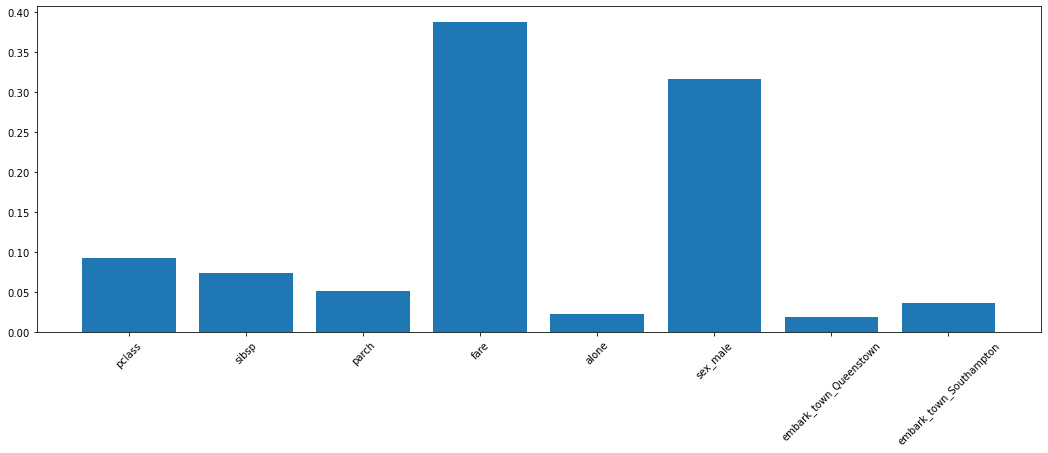

In [108]:
#make it in bar graph for good visual against the train columns
plt.figure(figsize = (18,6))
plt.bar(X_train.columns, model1.feature_importances_)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#cool
#fare and sex seems to be important factors for survival
#Poor Jack

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [116]:
#model score for accuracy, use model1.score
print("the accuracy of random forest classifier for our train model is" , round(model1.score(X_train,y_train),2))

the accuracy of random forest classifier for our train model is 0.94


In [118]:
#confusion matrix
# we need y_pred to find confusion matrix of y_train and y_pred
y_pred = model1.predict(X_train)

In [120]:
con=confusion_matrix(y_train,y_pred)
con

array([[324,   5],
       [ 26, 179]])

In [130]:
#change confusion matrix into dataframe
index_labels = ["Actual_death","Actual_survival"]
index_columns = ["Pred_death","Pred_survival"]
con_df = pd.DataFrame(con, index_labels, index_columns )
con_df

,Pred_death,Pred_survival
Actual_death,324,5
Actual_survival,26,179


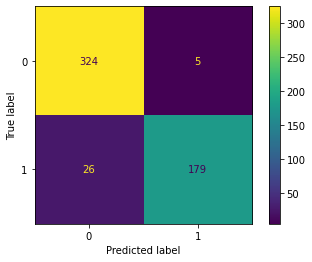

In [138]:
#cool confuison matrix
disp = ConfusionMatrixDisplay(confusion_matrix=con, display_labels=model1.classes_)

disp.plot()
plt.show()

In [126]:
#classification report
pd.DataFrame(classification_report(y_train,y_pred, output_dict = True))

,0,1,accuracy,macro avg,weighted avg
precision,0.925714,0.972826,0.941948,0.949270,0.943800
recall,0.984802,0.873171,0.941948,0.928987,0.941948
f1-score,0.954345,0.920308,0.941948,0.937327,0.941278
support,329.000000,205.000000,0.941948,534.000000,534.000000


3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [132]:
#from confusion matrix:
TN = con_df.iat[0,0]
FP= con_df.iat[0,1]
FN = con_df.iat[1,0]
TP = con_df.iat[1,1]
TN,TP,FN,TP

(324, 179, 26, 179)

In [145]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("accuracy", accuracy)
true_positive_rate = TP/(TP+FN)
print("true_positive_rate", true_positive_rate)
false_positive_rate = FP/(FP+TN)
print("false_positive_rate", false_positive_rate)
true_negative_rate = FN/(FN+TP)
print("true_negative_rate", true_negative_rate)
precision = TP/(TP+FP)
print("precision", precision)
recall = true_positive_rate
f1_score = 2 * (precision*recall) / (precision+recall)
print("f1_score", f1_score)
support_positive = TP + FN
print("support_positive", support_positive)
support_negative = FP + TN
print("support_negative", support_negative)


accuracy 0.9419475655430711
true_positive_rate 0.8731707317073171
false_positive_rate 0.015197568389057751
true_negative_rate 0.12682926829268293
precision 0.9728260869565217
f1_score 0.9203084832904883
support_positive 205
support_negative 329


4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.